# 1 Data preprocessing for CIFAR-10
-  The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. 
-  There are 50000 training images and 10000 test images.

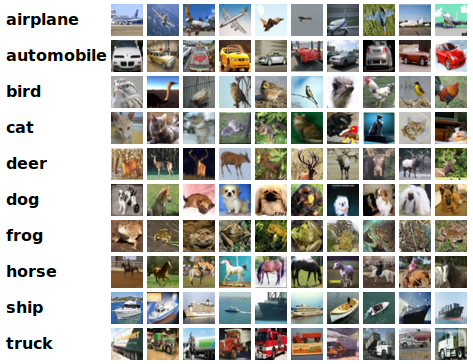

In [1]:
# lib
import tensorflow as tf
# enable eager execution
tf.enable_eager_execution()

import tensorflow.keras as K

In [1]:
# adjust cell width
from IPython.core.display import display, HTML 
display(HTML("<style>.container { width:100% !important; }</style>")) 

## 1.1 Dataset Description
Loading the dataset returns four NumPy arrays:
-  The <font color=green><b>train_images</b></font> and <font color=green><b>train_labels</b></font> arrays are the training set—the data the model uses to learn.
-  The model is tested against the test set, the <font color=red><b>test_images</b></font>, and <font color=red><b>test_labels</b></font> arrays.

-  The images are 32x32<font color=red><b>x3</b></font> NumPy arrays, with pixel values ranging between 0 and 255. 
-  The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

<td style="text-align:left;">

| Lable|Class|
|---|---|
|   0   | airplane|
|   1   | automobile    |
|   2   | bird   |
|   3   | cat      |
|   4   | deer       |
|   5   | dog     |
|   6   | frog      |
|   7   | horse    |
|   8   | ship        |
|   9   | truck |



In [1]:
# lib
import tensorflow as tf
# enable eager execution
#tf.enable_eager_execution()

import tensorflow.keras as K

In [2]:
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

1.12.0


## 1.2 Download dataset

In [3]:
cifar10 = K.datasets.cifar10

(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 
               'dog', 'frog', 'horse', 'ship', 'truck']

In [5]:
num_classes = len(class_names)

In [6]:
num_classes

10

In [8]:
# train_y = keras.utils.to_categorical(train_labels, num_classes)

In [9]:
# train_y[5]

## 1.3 Explore the data

In [8]:
train_images.shape

(50000, 32, 32, 3)

In [9]:
train_labels.shape

(50000, 1)

In [10]:
test_images.shape

(10000, 32, 32, 3)

In [11]:
test_labels.shape

(10000, 1)

In [12]:
train_labels[5]

array([1], dtype=uint8)

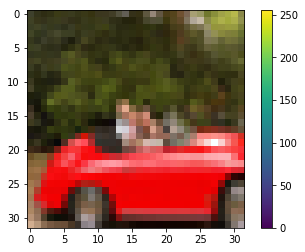

In [13]:
plt.figure()
plt.imshow(train_images[99])
plt.colorbar()
plt.grid(False)
plt.show()

In [14]:
train_labels[99][0]

1

In [15]:
class_names[train_labels[99][0]]

'automobile'

## 1.4 Scale value to range 0 to 1  

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## 1.5 Display the first 25 images 

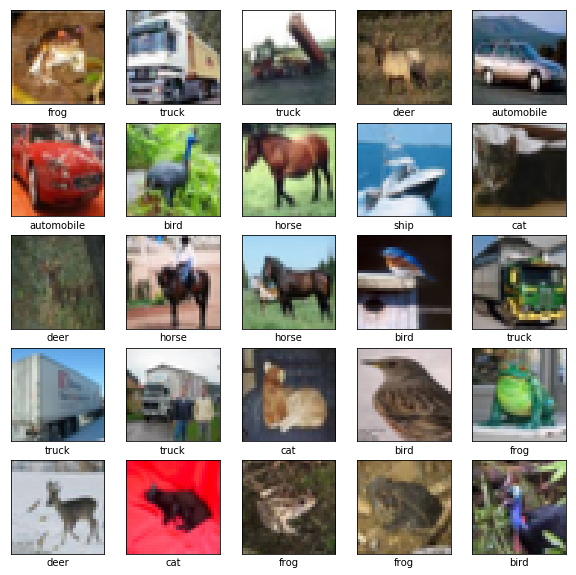

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# 2. CNN Model

## 2.1 build model

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense


In [10]:
bn_axis = 3

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=train_images.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
activation (Activation)      (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
__________

## 2.2 model compile and fit

In [12]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
%%time
hist = model.fit(train_images, train_labels, batch_size=64 ,epochs=10, validation_data=(test_images,test_labels) )

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 52s 1ms/step - loss: 1.5683 - acc: 0.4263 - val_loss: 1.2818 - val_acc: 0.5415
Epoch 2/10
50000/50000 [==============================] - 51s 1ms/step - loss: 1.1950 - acc: 0.5720 - val_loss: 1.0276 - val_acc: 0.6297
Epoch 3/10
50000/50000 [==============================] - 50s 1ms/step - loss: 1.0199 - acc: 0.6394 - val_loss: 0.9012 - val_acc: 0.6837
Epoch 4/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.9206 - acc: 0.6776 - val_loss: 0.7934 - val_acc: 0.7192
Epoch 5/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.8414 - acc: 0.7043 - val_loss: 0.8031 - val_acc: 0.7165
Epoch 6/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7883 - acc: 0.7236 - val_loss: 0.7294 - val_acc: 0.7457
Epoch 7/10
50000/50000 [==============================] - 53s 1ms/step - loss: 0.7407 - acc: 0.7399 - val_loss: 0.7080 - val_acc

In [14]:
# list all data in history
print(hist.history.keys())

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


## 2.3 visualization 

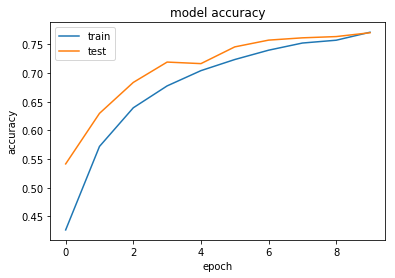

In [15]:
# summarize history for accuracy
plt.figure()
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

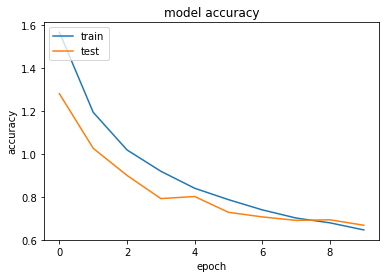

In [16]:
# summarize history for loss value
plt.figure()
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3 Self-paced CNN

### the paper: Self-paced Convolutional Neural Networks, IJCAI-17

## 3.1 Training loop

### the loss function of CNN 
$$ \Delta w = -\eta \frac{\partial E_{SPCN}^{i}}{\partial w} = -v_{i} * \eta \frac{\partial E_{CN}^{i}}{\partial w}$$ $$  E_{CN} (w) = \sum_{i=1}^{n}L(y_{i},g(x_{i},w))         $$

In [21]:
# define loss function of CNN
def loss(model, x, y):
    _y = model(x)
    return K.losses.sparse_categorical_crossentropy(y, _y)


### the objective function value

$$  E_{SPCN} (w) = \sum_{i=1}^{n}v_{i}L(y_{i},g(x_{i},w))         $$

In [22]:
# calculate objective function value and gradient
def grad(model, inputs, labels, v):
    with tf.GradientTape() as tape:
        loss_value = v*loss(model, inputs, labels)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)


In [23]:
# initialize
optimizer = tf.train.AdadeltaOptimizer()
global_step = tf.Variable(0)

num_epochs = 3

# tf require float32 data type
train_x = np.float32(train_images)
test_x = np.float32(test_images)

# Initialization: θ, v, λ, μ
# model weights θ is initialized automatically
# sampe weights v is randomly uniform [0.1,1)
# train_v = np.random.uniform(0.01,1.0, train_x.shape[0])
# initialize v all 0.1
train_v = np.full((len(train_x),),0.1)
train_v = np.float32(train_v)

#the age parameter λ that controls the learning pace
# When λ is small, the model is young, and only easy samples with small losses are considered.
# sparse regularizer f(v;λ) = (λ/(2×3))v^3−λv
age = 1 # paper did not give a value
# the age parameter λ=μλ at each step
# μ is set to be 1.3 experimentally
mu = 1.3


In [26]:

train_accu = []
test_accu = []
v_hist = []
# start training

for epoch in range(num_epochs):

    # Training loop - without batch
    # Optimize the model
    # θ-step : Solving θ by fixed v
    print("\nEpoch: {} ----------------------------------------------".format(epoch+1))
    print("\nage = {}".format(age))
    print("Step 1: fix v, update model weights:")
    progressBar = K.utils.Progbar(target=len(train_x))
    
    
    ####3   ??????????????????????????
    for i in range(len(train_x)):
        x = np.expand_dims(train_x[i], axis=0)
        y = train_labels[i][0]
        v = train_v[i]
        loss_value, grads = grad(model, x, y, v)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        # progressBar.add(1)
        progressBar.update(current=i+1)
    
    # v-step: Solving v by fixed θ using equation (13)
    # update loss value with updated model weights
    print("\nStep 2: fix model weights update v:")
    progressBar = K.utils.Progbar(target=len(train_x))
    for i in range(len(train_x)):
        x = np.expand_dims(train_x[i], axis=0)
        y = train_labels[i][0]
        v = train_v[i]
        _y = model(x) # calculate model output
        l = K.losses.sparse_categorical_crossentropy(y, _y)
        
        # print("\nloss_value: {}".format(loss_value))
        if l < age/2.0:
            train_v[i] = 1
        elif age/2.0 <= l <= age:
            train_v[i] = np.sqrt(2 - 2*loss_value/age)
        else:
            train_v[i] = 0.0
        # progressBar.add(1)
        progressBar.update(current=i+1)
        
    # end epoch
    print("Ending epoch")
    
    
    _train_y = model.predict(train_x)
    _train_accu = np.mean(K.metrics.sparse_categorical_accuracy(train_labels, _train_y))
    train_accu.append(_train_accu)
    print("\ntrain_accuracy = {}".format(_train_accu))
    # test accuracy on test set
    _test_y = model.predict(test_x)
    _test_accu = np.mean(K.metrics.sparse_categorical_accuracy(test_labels, _test_y))
    test_accu.append(_test_accu)
    print("\ntest_accuracy = {}".format(_test_accu))
    # recording v
    v_hist.append(train_v)
    print("\ntrainig v describe")
    print(pd.Series(train_v).describe())
    print("\n")
    # update age parameter
    age = mu*age




Epoch: 1 ----------------------------------------------

age = 0.1
Step 1: fix v, update model weights:
50000/50000 [==============================] - 757s 15ms/step

Step 2: fix model weights update v:
50000/50000 [==============================] - 244s 5ms/step
Ending epoch

train_accuracy = 0.13899999856948853

test_accuracy = 0.14010000228881836

trainig v describe
count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
dtype: float64



Epoch: 2 ----------------------------------------------

age = 0.13
Step 1: fix v, update model weights:
50000/50000 [==============================] - 760s 15ms/step

Step 2: fix model weights update v:
50000/50000 [==============================] - 244s 5ms/step
Ending epoch

train_accuracy = 0.13899999856948853

test_accuracy = 0.14010000228881836

trainig v describe
count    50000.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.

In [25]:
print("\ntrain_accuracy = {}".format(_train_accu))


train_accuracy = 0.13899999856948853


# Exercise on Fashion MNiST dataset

Different from former example, this exmaple has two difference.

(1) The data set is different;

(2) Build a different CNN model

# Step 1 download dataset

## just use the 500~1000 samples

In [22]:
# Helper libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

print(tf.__version__)

1.13.0-rc1


In [23]:
fashion_mnist = K.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

print(train_images.shape)
print(train_labels.shape)

print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [24]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

num_classes = len(class_names)

In [25]:
train_images = train_images / 255.0
test_images = test_images / 255.0

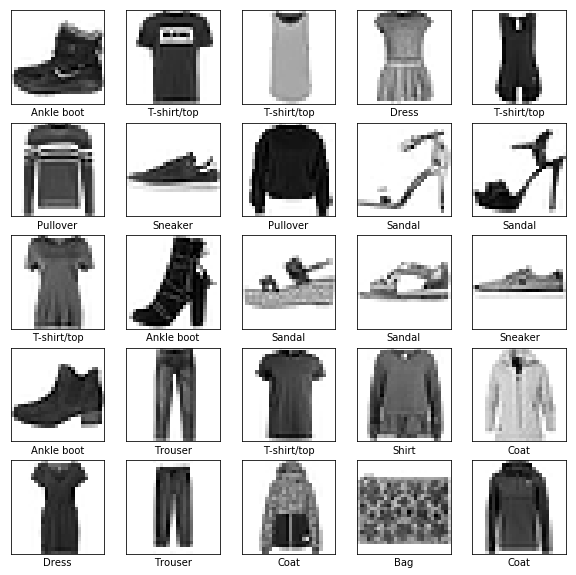

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
##############################
#####  Input your codes  #####
##############################


# Step 2 build the CNN model

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense


In [ ]:
##############################
#####  Input your codes  #####
##############################

# Step 3 calculate the self-paced loss with the CNN model

In [32]:
# define loss function based on equation (14)
def loss(model, x, y):
    _y = model(x)
    return K.losses.sparse_categorical_crossentropy(y, _y)


In [33]:
# calculate loss value and gradient
def grad(model, inputs, labels, v):
    with tf.GradientTape() as tape:
        loss_value = v*loss(model, inputs, labels)
    return loss_value, tape.gradient(loss_value, model.trainable_variables)

In [34]:
# initialize
optimizer = tf.train.AdadeltaOptimizer()
global_step = tf.Variable(0)

num_epochs = 3

# tf require float32 data type
train_x = np.float32(train_x)
test_x = np.float32(test_x)

# Initialization: θ, v, λ, μ
# model weights θ is initialized automatically
# sampe weights v is randomly uniform [0.1,1)
# train_v = np.random.uniform(0.01,1.0, train_x.shape[0])
# initialize v all 0.1
train_v = np.full((len(train_x),),0.1)
train_v = np.float32(train_v)
# the age parameter λ that controls the learning pace
# When λ is small, the model is young, and only easy samples with small losses are considered.
# sparse regularizer f(v;λ) = (λ/(2×3))v^3−λv
age = 0.1 # paper did not give a value
# the age parameter λ=μλ at each step
# μ is set to be 1.3 experimentally
mu = 1.3


In [35]:
print(train_x.shape)
print(test_x.shape)
print(train_labels.shape)
print(test_labels.shape)

(500, 28, 28, 1)
(10000, 28, 28, 1)
(500, 1)
(10000, 1)


In [36]:
%%time

train_accu = []
test_accu = []
v_hist = []
# start training

for epoch in range(num_epochs):

    # Training loop - without batch
    # Optimize the model
    # θ-step : Solving θ by fixed v
    print("\nEpoch: {} ----------------------------------------------".format(epoch+1))
    print("\nage = {}".format(age))
    print("Step 1: fix v, update model weights:")
    progressBar = K.utils.Progbar(target=len(train_x))
    for i in range(len(train_x)):
        x = np.expand_dims(train_x[i], axis=0)
        y = train_labels[i][0]
        v = train_v[i]
        loss_value, grads = grad(model, x, y, v)
        optimizer.apply_gradients(zip(grads, model.trainable_variables), global_step)
        # progressBar.add(1)
        progressBar.update(current=i+1)
    
    # v-step: Solving v by fixed θ using equation (13)
    # update loss value with updated model weights
    print("\nStep 2: fix model weights update v:")
    progressBar = K.utils.Progbar(target=len(train_x))
    for i in range(len(train_x)):
        x = np.expand_dims(train_x[i], axis=0)
        y = train_labels[i][0]
        v = train_v[i]
        _y = model(x) # calculate model output
        l = K.losses.sparse_categorical_crossentropy(y, _y)
        # print("\nloss_value: {}".format(loss_value))
        if l < age/2.0:
            train_v[i] = 1
        elif age/2.0 <= l <= age:
            train_v[i] = np.sqrt(2 - 2*loss_value/age)
        else:
            train_v[i] = 0.0
        # progressBar.add(1)
        progressBar.update(current=i+1)
        
    # end epoch
    print("Ending epoch")
    _train_y = model.predict(train_x)
    _train_accu = np.mean(K.metrics.sparse_categorical_accuracy(train_labels, _train_y))
    train_accu.append(_train_accu)
    print("\ntrain_accuracy = {}".format(_train_accu))
    # test accuracy on test set
    _test_y = model.predict(test_x)
    _test_accu = np.mean(K.metrics.sparse_categorical_accuracy(test_labels, _test_y))
    test_accu.append(_test_accu)
    print("\ntest_accuracy = {}".format(_test_accu))
    # recording v
    v_hist.append(train_v)
    print("\ntrainig v describe")
    print(pd.Series(train_v).describe())
    print("\n")
    # update age parameter
    age = mu*age




Epoch: 1 ----------------------------------------------

age = 0.1
Step 1: fix v, update model weights:
500/500 [==============================] - 2s 4ms/step

Step 2: fix model weights update v:
500/500 [==============================] - 1s 1ms/step
Ending epoch

train_accuracy = 0.10599999874830246

test_accuracy = 0.11509999632835388

trainig v describe
count    500.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64



Epoch: 2 ----------------------------------------------

age = 0.13
Step 1: fix v, update model weights:
500/500 [==============================] - 2s 3ms/step

Step 2: fix model weights update v:
500/500 [==============================] - 1s 2ms/step
Ending epoch

train_accuracy = 0.10599999874830246

test_accuracy = 0.11509999632835388

trainig v describe
count    500.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
dtype: float64



Epoc

In [37]:
print("\ntrain_accuracy = {}".format(_train_accu))


train_accuracy = 0.10599999874830246
